<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn07_ConstrainedOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
library(MASS);library(NlcOptim)

## Constrained Optimization ##
The following code illustrates how we will find optimal points using Lagrange Multipliers. We will review the mathematics of Lagrange in class. Load the libraries and use the solnl command along with the necessary constraints depending on the problem.

### Solution to a generalized nonlinear optimization problem
$$ \min_{\vec{x}}{f(\vec{x})}$$
$$ \text{subject to } ceq(\vec{x})=0 $$
$$ Aeq\hspace{2pt}\vec{x}=Beq$$
$$ A\hspace{2pt}\vec{x}\le B$$
$$ lb \le \vec{x} \le ub $$


#### Usage
``` 
library(MASS);library(NlcOptim)
solnl(X = NULL, objfun = NULL, confun = NULL, A = NULL, B = NULL,
  Aeq = NULL, Beq = NULL, lb = NULL, ub = NULL, tolX = 1e-05,
  tolFun = 1e-06, tolCon = 1e-06, maxnFun = 1e+07, maxIter = 4000)
```

#### Arguments<br>
- ```X``` Starting vector of parameter values.<br>
- ```objfun``` Nonlinear objective function that is to be optimized.
- ```confun``` Nonlinear constraint function. Return a ceq vector and a c vector as nonlinear equality constraints and an inequality constraints.
- ```A```  A in the linear inequality constraints.
- ```B```  B in the linear inequality constraints.
- ```Aeq``` Aeq in the linear equality constraints.
- ```Beq``` Beq in the linear equality constraints.
- ```lb```  Lower bounds of parameters.
- ```ub```  Upper bounds of parameters.
- ```tolX``` The tolerance in X.
- ```tolFun``` The tolerance in the objective function.
- ```tolCon``` The tolenrance in the constraint function.
</ol>

#### Examples from the book ####
The following problems are the examples from the text using the ```solnl``` command and various types of constraints. The constraints listed on page 32 result in the following constraint matrix for $A$ and $B$:

\begin{equation*}
  \begin{pmatrix}
    1&0\\
    0&1\\
    1&1\\
    -1&0\\
    0&-1
  \end{pmatrix}
  \begin{pmatrix}
    x_1\\
    x_2
  \end{pmatrix}=
  \begin{pmatrix}
    5000\\
    8000\\
    10000\\
    0\\
    0
  \end{pmatrix}
\end{equation*}

Notice how the "greater than" constraints (last two rows) were turned into less than constraints by multiplying the inequality by -1. The last line reads "negative $x_2$ is less than or equal to 0" which is also the same as "$x_2$ is greater than or equal to 0" (from the book $t \ge 0$). Running the code below gives the same answers as the book on page 38 (bottom). 

In [0]:
## Example 2.2 - Meerschaert ##
P = function(x){
    return(((339-0.01*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1)
}
###Linear Inequality Constraints##
x0=c(1000,1000)
A = matrix(c(1,0,1,-1,0,0,1,1,0,-1),nrow=5) #defining this matrix is not intuitive - make sure we talk in class
B = matrix(c(5000,8000,10000,0,0),nrow=5)
print(A)
print(B)
solnl(x0,objfun=P,A=A,B=B)

     [,1] [,2]
[1,]    1    0
[2,]    0    1
[3,]    1    1
[4,]   -1    0
[5,]    0   -1
      [,1]
[1,]  5000
[2,]  8000
[3,] 10000
[4,]     0
[5,]     0


$par
         [,1]
[1,] 3846.154
[2,] 6153.846

$fn
[1] -532307.7

$counts
     nfval ngval
[1,]    19     7

$lambda
$lambda$lower
     [,1]
[1,]    0
[2,]    0

$lambda$upper
     [,1]
[1,]    0
[2,]    0

$lambda$ineqlin
[1]  0  0 24  0  0


$grad
          [,1]
[1,] -24.00000
[2,] -23.99999

$hessian
            [,1]        [,2]
[1,] 0.020029796 0.007039313
[2,] 0.007039313 0.020238593

#### Note the number of $\lambda$'s in the solution. 
The only non-zero $\lambda$ is the third one of the 5. This means that the only active constraint is the third one $x_1+x_2=10000$.

In [0]:
ans=solnl(x0,objfun=P,A=A,B=B)
print(ans$lambda)

$lower
     [,1]
[1,]    0
[2,]    0

$upper
     [,1]
[1,]    0
[2,]    0

$ineqlin
[1]  0  0 24  0  0



#### Graphs of the feasible region and answer #### 
Note what the outer function does (it was discussed in the last R notebook for lesson 6). We need a way of getting combinations of x's and y's to fill up a matrix of function values - that is what this function is designed to do. I put it in my library in order to be able to reference it later. The graph below is a combination of Figure 2.10 and 2.11 from the book.

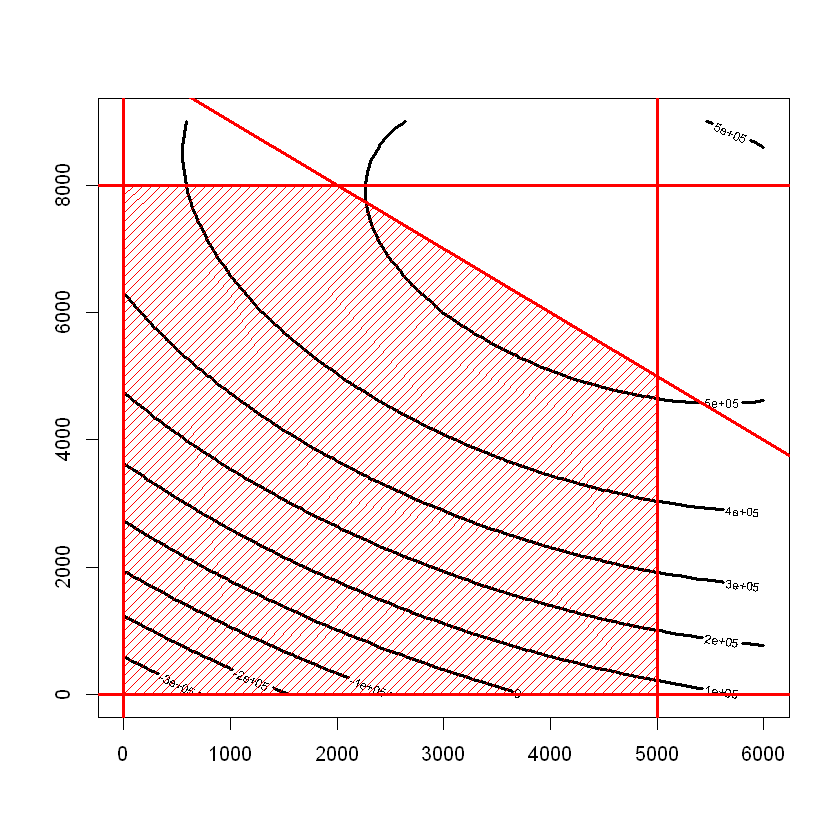

In [0]:
## Same outer product as previous lesson ##
Outer = function(f,x){
  n1 = length(x[[1]])
  n2 = length(x[[2]])
  res = matrix(0,nrow=n1,ncol=n2)
  rownames(res) = x[[1]]
  colnames(res) = x[[2]]
  for (i in 1:n1){
    for (j in 1:n2){
      res[i,j]=f(c(x[[1]][[i]],x[[2]][[j]]))
    }
  }
  return(res)
}

X = list(x=seq(0,6000,100),y=seq(0,9000,100))
Z = Outer(P,X)
## This feasible region is an easy one to draw ###
contour(x=X$x,y=X$y,z=-Z,lwd=3)
abline(h=8000,col="red",lwd=3) #line at y=8000
abline(v=5000,col="red",lwd=3) #line at x=5000
abline(h=0,col="red",lwd=3) #line at y=0
abline(v=0,col="red",lwd=3) #line at x=0
abline(a=10000,b=-1,col="red",lwd=3) #line with y=bx+a; b is the slope, a is the y-intercept
pts = list(x=c(0,0,2000,5000,5000),y=c(0,8000,8000,5000,0)) #we need the intersection points for shading
polygon(pts$x,pts$y,density = 20,col="red") #this shades the feasible region red

#### Example 2.3 (p34)
$$\max{x+2y+3z}  $$
$$\text{  subject to (s.t.):  } x^2+y^2+z^2=3$$

In [0]:
## Example 2.3 - Meerschart ##
obj=function(x){
  return(-(x[1]+2*x[2]+3*x[3]))
}
#constraint function#
con=function(x){
  f=NULL
  f=rbind(f,x[1]^2+x[2]^2+x[3]^2-3)
  return(list(ceq=f,c=NULL))
}
x0=c(1,1,1)
ans=solnl(x0,objfun=obj,confun=con)
print(ans)

$par
          [,1]
[1,] 0.4629100
[2,] 0.9258201
[3,] 1.3887301

$fn
[1] -6.480741

$counts
     nfval ngval
[1,]    28     7

$lambda
$lambda$lower
     [,1]
[1,]    0
[2,]    0
[3,]    0

$lambda$upper
     [,1]
[1,]    0
[2,]    0
[3,]    0

$lambda$eqnonlin
[1] 1.080123


$grad
           [,1]
[1,] -0.9999999
[2,] -2.0000000
[3,] -3.0000000

$hessian
           [,1]      [,2]       [,3]
[1,]  1.9636528 0.3785931 -0.2065118
[2,]  0.3785931 1.3657744  0.3529425
[3,] -0.2065118 0.3529425  1.9124159



#### Example 2.4 (p35)
$$\max{x+2y+3z}  $$
$$\text{s.t.:  } x^2+y^2+z^2=3$$
$$ x=1$$
<br><br>Notice how the solution contains two lambdas (because of the two constraints) - the lambdas will become important in future lessons.

In [0]:
## Example 2.4 - Meerschaert ####
obj=function(x){
  return(-(x[1]+2*x[2]+3*x[3]))
}
#constraint function
con=function(x){
    f=NULL
    f=rbind(f,x[1]^2+x[2]^2+x[3]^2-3)
    f=rbind(f,x[1]-1)
    return(list(ceq=f,c=NULL))
}
x0=c(1,1,1)
ans=solnl(x0,objfun=obj,confun=con)
print(ans$par)
print(-ans$fn)
print(ans$lambda)

          [,1]
[1,] 1.0000000
[2,] 0.7844646
[3,] 1.1766968
[1] 6.09902
$lower
     [,1]
[1,]    0
[2,]    0
[3,]    0

$upper
     [,1]
[1,]    0
[2,]    0
[3,]    0

$eqnonlin
[1] 1.274755 1.549510



#### Another way of solving example 2.2
Example 2.2 had the solution on the edge of the feasible region. In this case, it is possible to use the confun function (see below) instead of using the linear inequality constraint matrix. The difference here is that we actually know the active constraint for the solution ($x_1+x_2 = 10000$) which you probably will not know beforehand.

In [0]:
obj=function(x){
  return(((339-0.01*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1)
}
#constraint function
con=function(x){
    f=NULL
    f=rbind(f,x[1]+x[2]-10000)
    return(list(ceq=f,c=NULL))
}
x0=c(1,1,1)
ans=solnl(x0,objfun=obj,confun=con)
print(ans$par)
print(-ans$fn)
print(ans$lambda)

         [,1]
[1,] 3846.154
[2,] 6153.846
[3,]    1.000
[1] 532307.7
$lower
     [,1]
[1,]    0
[2,]    0
[3,]    0

$upper
     [,1]
[1,]    0
[2,]    0
[3,]    0

$eqnonlin
[1] 24

